In [1]:
import os
import kagglehub
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Import training functions from train.py
from train import train_model, plot_metrics

# Download latest version of the dataset from Kaggle
path = kagglehub.dataset_download("tongpython/cat-and-dog")


### Create train and test datset with dataloader

In [2]:
# Set subclass of Dataset for kaggle Dataset
class PetDataSet(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes
    
# Set paths to training and test folders with classes as subdirs
train_folder = os.path.join(path, "training_set/training_set")
test_folder = os.path.join(path, "test_set/test_set")

# Get a dictionary associating target values with folder names
target_to_class = {v: k for k, v in ImageFolder(train_folder).class_to_idx.items()}
print("Classes found:", target_to_class)

# Define transformations and create DataLoaders
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_dataset = PetDataSet(train_folder, transform=transform)
test_dataset = PetDataSet(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Classes found: {0: 'cats', 1: 'dogs'}


### Train pretrained model

------------------ Starting epoch 1  ------------------


Testing loop: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]


New highest accuracy: 0.9466139396935245, saving model...
Epoch 1/10 - Train loss: 0.24279528390162441, Test loss: 0.12427863444777568, Accuracy: 0.9466139396935245
------------------ Starting epoch 2  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.13it/s]


Epoch 2/10 - Train loss: 0.15380498487118405, Test loss: 0.2123185382383446, Accuracy: 0.9006426099851705
------------------ Starting epoch 3  ------------------


Testing loop: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]


Epoch 3/10 - Train loss: 0.12820502259930844, Test loss: 0.20593683393621467, Accuracy: 0.9159663865546218
------------------ Starting epoch 4  ------------------


Testing loop: 100%|██████████| 32/32 [00:12<00:00,  2.55it/s]


New highest accuracy: 0.9485912011863569, saving model...
Epoch 4/10 - Train loss: 0.12133689187446739, Test loss: 0.13955143346343957, Accuracy: 0.9485912011863569
------------------ Starting epoch 5  ------------------


Testing loop: 100%|██████████| 32/32 [00:16<00:00,  1.98it/s]


Epoch 5/10 - Train loss: 0.09839803448027183, Test loss: 0.16504032305316116, Accuracy: 0.944142362827484
------------------ Starting epoch 6  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.24it/s]


New highest accuracy: 0.9550173010380623, saving model...
Epoch 6/10 - Train loss: 0.13272542559229383, Test loss: 0.10800903217956329, Accuracy: 0.9550173010380623
------------------ Starting epoch 7  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.00it/s]


Epoch 7/10 - Train loss: 0.10966329172853936, Test loss: 0.15254540561716332, Accuracy: 0.9505684626791894
------------------ Starting epoch 8  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.10it/s]


New highest accuracy: 0.9565002471576866, saving model...
Epoch 8/10 - Train loss: 0.09092422698465624, Test loss: 0.10867950885206298, Accuracy: 0.9565002471576866
------------------ Starting epoch 9  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.04it/s]


Epoch 9/10 - Train loss: 0.07816015385244877, Test loss: 0.16643424606796867, Accuracy: 0.9421651013346515
------------------ Starting epoch 10  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.05it/s]


New highest accuracy: 0.967375185368265, saving model...
Epoch 10/10 - Train loss: 0.0982221244760486, Test loss: 0.09816691571468182, Accuracy: 0.967375185368265


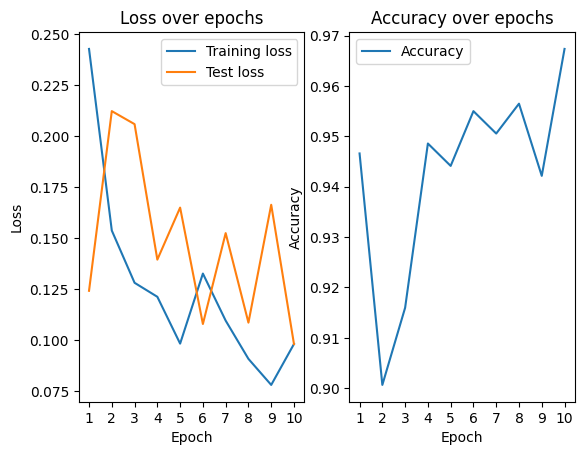

<Figure size 1200x500 with 0 Axes>

In [3]:
train_losses, test_losses, accuracies = train_model(train_loader, 
                                                    test_loader,
                                                    num_epochs=10, 
                                                    learning_rate=0.001, 
                                                    model_name="pretrained_classifier",
                                                    pretrained=True,
                                                    use_LR_scheduler=True)
plot_metrics(train_losses, test_losses, accuracies)

## Train model from scratch

------------------ Starting epoch 1  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.44it/s]


New highest accuracy: 0.6080079090459714, saving model...
Epoch 1/25 - Train loss: 0.696511860522235, Test loss: 0.7319707466833555, Accuracy: 0.6080079090459714
------------------ Starting epoch 2  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]


Epoch 2/25 - Train loss: 0.6626354759294938, Test loss: 0.8251102751160516, Accuracy: 0.5219970341077608
------------------ Starting epoch 3  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.29it/s]


New highest accuracy: 0.6431043005437469, saving model...
Epoch 3/25 - Train loss: 0.6571656002095906, Test loss: 0.7349706832365535, Accuracy: 0.6431043005437469
------------------ Starting epoch 4  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]


Epoch 4/25 - Train loss: 0.6244613171070534, Test loss: 0.7742493890089619, Accuracy: 0.6386554621848739
------------------ Starting epoch 5  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]


Epoch 5/25 - Train loss: 0.630549381852969, Test loss: 0.6972236747619132, Accuracy: 0.6347009391992091
------------------ Starting epoch 6  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.29it/s]


Epoch 6/25 - Train loss: 0.6033324286164826, Test loss: 0.7397016208182451, Accuracy: 0.6075135936727633
------------------ Starting epoch 7  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]


New highest accuracy: 0.6589223924864063, saving model...
Epoch 7/25 - Train loss: 0.584447804955227, Test loss: 0.6721424786277296, Accuracy: 0.6589223924864063
------------------ Starting epoch 8  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.27it/s]


New highest accuracy: 0.7103311913000494, saving model...
Epoch 8/25 - Train loss: 0.5733313961970218, Test loss: 0.6606917699492337, Accuracy: 0.7103311913000494
------------------ Starting epoch 9  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.32it/s]


New highest accuracy: 0.7330696984676224, saving model...
Epoch 9/25 - Train loss: 0.5640890096143809, Test loss: 0.5825059488747182, Accuracy: 0.7330696984676224
------------------ Starting epoch 10  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]


Epoch 10/25 - Train loss: 0.5392530980071449, Test loss: 0.5633373054990188, Accuracy: 0.7162629757785467
------------------ Starting epoch 11  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]


Epoch 11/25 - Train loss: 0.5478949860808702, Test loss: 0.6006910714605805, Accuracy: 0.6579337617399901
------------------ Starting epoch 12  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]


Epoch 12/25 - Train loss: 0.5276444343981483, Test loss: 0.6398188188281675, Accuracy: 0.6668314384577361
------------------ Starting epoch 13  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.28it/s]


Epoch 13/25 - Train loss: 0.5171269025525623, Test loss: 0.621237281940093, Accuracy: 0.6772120612951062
------------------ Starting epoch 14  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]


Epoch 14/25 - Train loss: 0.5218095055600392, Test loss: 0.6404288098090837, Accuracy: 0.6950074147305981
------------------ Starting epoch 15  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]


New highest accuracy: 0.7385071675729116, saving model...
Epoch 15/25 - Train loss: 0.48123122688608566, Test loss: 0.5233449414703908, Accuracy: 0.7385071675729116
------------------ Starting epoch 16  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.31it/s]


Epoch 16/25 - Train loss: 0.49270689548513874, Test loss: 0.5402187617828041, Accuracy: 0.731586752347998
------------------ Starting epoch 17  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.30it/s]


Epoch 17/25 - Train loss: 0.4785788260200186, Test loss: 0.6296440552380553, Accuracy: 0.6747404844290658
------------------ Starting epoch 18  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.20it/s]


New highest accuracy: 0.7666831438457736, saving model...
Epoch 18/25 - Train loss: 0.4756914162546452, Test loss: 0.4904642967646274, Accuracy: 0.7666831438457736
------------------ Starting epoch 19  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.14it/s]


Epoch 19/25 - Train loss: 0.43846001843226695, Test loss: 0.5153478991113202, Accuracy: 0.7464162135442413
------------------ Starting epoch 20  ------------------


Testing loop: 100%|██████████| 32/32 [00:18<00:00,  1.70it/s]


New highest accuracy: 0.7750865051903114, saving model...
Epoch 20/25 - Train loss: 0.4546412277489733, Test loss: 0.4903757175300832, Accuracy: 0.7750865051903114
------------------ Starting epoch 21  ------------------


Testing loop: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]


Epoch 21/25 - Train loss: 0.42674765523934943, Test loss: 0.5151890914627543, Accuracy: 0.7736035590706871
------------------ Starting epoch 22  ------------------


Testing loop: 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]


Epoch 22/25 - Train loss: 0.4081862756343725, Test loss: 0.5754419383558376, Accuracy: 0.6984676223430548
------------------ Starting epoch 23  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.51it/s]


Epoch 23/25 - Train loss: 0.41624310844246853, Test loss: 0.5378287216990052, Accuracy: 0.7632229362333168
------------------ Starting epoch 24  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.48it/s]


Epoch 24/25 - Train loss: 0.40436279994111596, Test loss: 0.5685890951164866, Accuracy: 0.7192288680177954
------------------ Starting epoch 25  ------------------


Testing loop: 100%|██████████| 32/32 [00:07<00:00,  4.23it/s]


Epoch 25/25 - Train loss: 0.34527210020259497, Test loss: 0.5479536706114899, Accuracy: 0.7627286208601087


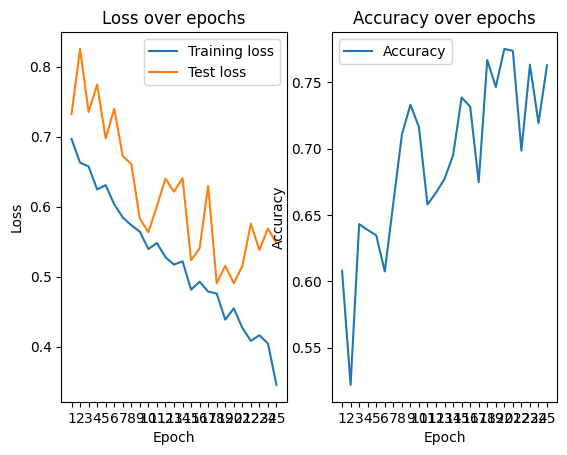

<Figure size 1200x500 with 0 Axes>

In [4]:
train_losses, test_losses, accuracies = train_model(train_loader, 
                                                    test_loader, 
                                                    num_epochs=25, 
                                                    learning_rate=0.001, 
                                                    model_name="scratch_classifier", 
                                                    pretrained=False,
                                                    use_LR_scheduler=True)
plot_metrics(train_losses, test_losses, accuracies)